In [1]:
# 3. Develop a program to implement Principal Component Analysis (PCA) 
# for reducing the dimensionality of the Iris dataset from 4 features to 2 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [35]:
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(df.head())

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [36]:
df_standardized = StandardScaler().fit_transform(df)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_standardized)

pdf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])
finalDf = pd.concat([pdf, pd.DataFrame(data=iris.target, columns=['target'])], axis=1)
print(finalDf.head())

   Principal Component 1  Principal Component 2  target
0              -2.264703               0.480027       0
1              -2.080961              -0.674134       0
2              -2.364229              -0.341908       0
3              -2.299384              -0.597395       0
4              -2.389842               0.646835       0


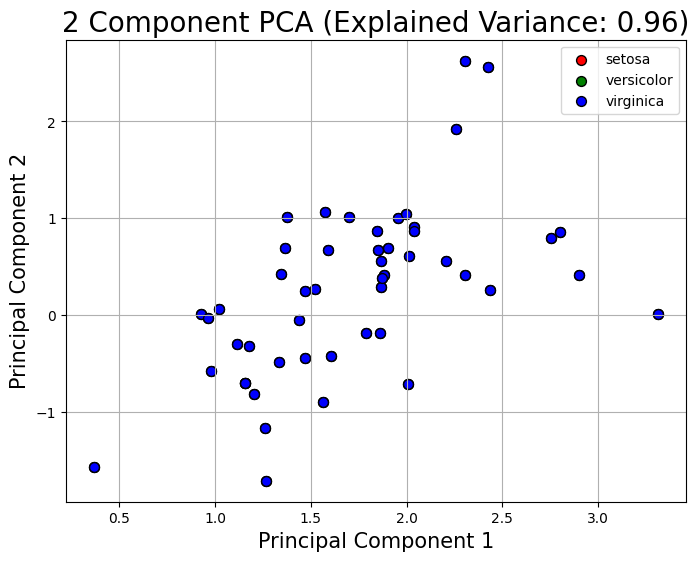

Explaioned variances color ratio : [0.72962445 0.22850762]


In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
explained_variance = sum(pca.explained_variance_ratio_)
ax.set_title(f'2 Component PCA (Explained Variance: {explained_variance:.2f})', fontsize=20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1'],
               finalDf.loc[indicesToKeep, 'Principal Component 2'],
               c=color, label= iris.target_names[target], s=50, edgecolors='k')
ax.legend()
ax.grid()
plt.show()

print('Explaioned variances color ratio :', pca.explained_variance_ratio_)
    

In [62]:
print(pdf.head())
print(pdf.shape)
print(len(iris.target))


   Principal Component 1  Principal Component 2
0              -2.264703               0.480027
1              -2.080961              -0.674134
2              -2.364229              -0.341908
3              -2.299384              -0.597395
4              -2.389842               0.646835
(150, 2)
150


In [63]:
print(finalDf.columns)


Index(['Principal Component 1', 'Principal Component 2', 'target'], dtype='object')
